<a href="https://colab.research.google.com/github/Myavuzars/MachineLearning/blob/main/Churn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#PANDAS, NUMPY, SEABORN, MATPLOTLIB
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Remove Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#SKLEARN 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
#MODELS 
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/Machine Learning /Customer-Churn.csv")

df.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [7]:
df.shape

(7043, 21)

In [8]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
df.drop(['customerID'], axis=1, inplace=True)

In [10]:
#Removing missing variables
df['TotalCharges']=df['TotalCharges'].str.replace(' ','0').astype('float64')


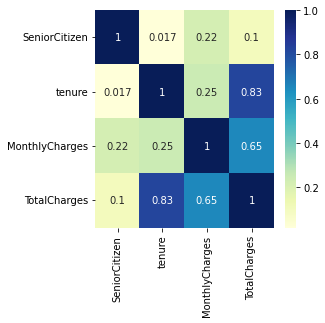

In [11]:
#Correlation Matrix
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(4,4))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="YlGnBu")

In [12]:
#Splitting data into Numerical and Categorical
catdf =df.iloc[:,:-3]
numdf= df.iloc[:,-3:-1]
y= df.iloc[:,-1]
numdf.head()

,MonthlyCharges,TotalCharges
0,29.85,29.85
1,56.95,1889.50
2,53.85,108.15
3,42.30,1840.75
4,70.70,151.65


In [13]:
print(catdf.shape)
print(numdf.shape)
print(y.shape)

(7043, 17)
(7043, 2)
(7043,)


In [14]:
#Converting data into Categorical
def convert_cat(df):
  for col in df.columns:
      df[col] = df[col].astype('category')

convert_cat(catdf)

In [15]:
#Encoding Categoricl Variables
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

for col in catdf:
  catdf[col] = encoder.fit_transform(catdf[col])

In [16]:
#Encoding Target Variable
y= encoder.fit_transform(y)

In [17]:
#Scaling Numerical Variables
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
numdf =scaler.fit_transform(numdf)
numdf =pd.DataFrame(numdf)

In [18]:
#One hot encoding for categorical variables
dummydf = pd.get_dummies(catdf, columns=['PhoneService', 'gender', 'StreamingTV', 'MultipleLines','InternetService', 'SeniorCitizen', 'Partner','Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingMovies','Contract', 'PaperlessBilling','PaymentMethod'], drop_first = True)


In [19]:
#Generating X Data set Before Feature Reduction
X_FULL = pd.concat([dummydf,numdf], axis=1 )
X_FULL.head()
print(X_FULL.shape)
print(y.shape)

(7043, 30)
(7043,)


In [20]:
#Data Set Split
X_FULL_train, X_FULL_test, y_FULL_train, y_FULL_test = train_test_split(X_FULL, y, stratify=y, random_state=2)

In [21]:
#Generating X Data set After Feature Reduction

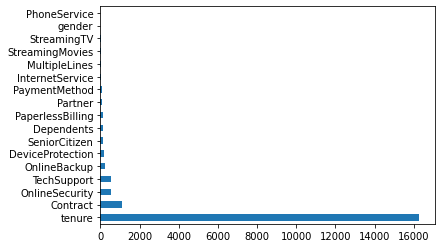

In [22]:
#Chi Square Independency Testing  
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
k=len(catdf.columns)
test = SelectKBest(score_func=chi2, k=k) 
fit = test.fit(catdf, y)
fit.scores_

imp = pd.Series(fit.scores_, index= catdf.columns)
imp.nlargest(k).plot(kind="barh")
plt.show()

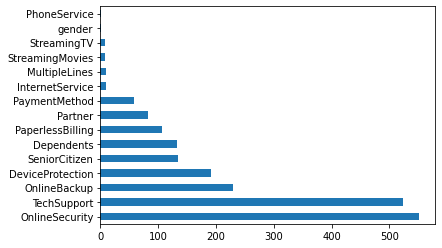

In [23]:
#Chi Square Independency Testing after removing tenure and Contract to see the better picture
cat_df =catdf.drop(['tenure', 'Contract'], axis=1)

k=len(cat_df.columns)
test = SelectKBest(score_func=chi2, k=k) 
fit = test.fit(cat_df, y)
fit.scores_

imp = pd.Series(fit.scores_, index= cat_df.columns)
imp.nlargest(k).plot(kind="barh")
plt.show()

In [24]:
# It is better drop the columns that scores lower than Payment Method (but I will keep the Internetservice due data visuazlization) 
new_catdf = catdf.drop(['PhoneService', 'gender', 'StreamingTV', 'MultipleLines'], axis=1)

In [25]:
#One hot encoding for categorical variables
new_dummydf = pd.get_dummies(new_catdf, columns=['SeniorCitizen','InternetService', 'Partner','Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingMovies','Contract', 'PaperlessBilling','PaymentMethod'], drop_first = True)


In [26]:
#Generating X Data set after Feature Reduction
X_SEL = pd.concat([new_dummydf,numdf], axis=1 )
X_SEL.head()
print(X_SEL.shape)
print(y.shape)

(7043, 24)
(7043,)


In [27]:
#Data Set Split
X_SEL_train, X_SEL_test, y_SEL_train, y_SEL_test = train_test_split(X_SEL, y, stratify=y, random_state=2)

In [28]:
#MODELS IMPLEMENTATION

In [29]:
#Dummy Classifieer

# define the model
model_Dummy = DummyClassifier(strategy='most_frequent')
model_Dummy.fit(X_FULL, y)
Dummy_pred= model_Dummy.predict(X_FULL)
Dummy_score= round(model_Dummy.score(X_FULL, y),3)
Dummy_recall=recall_score(y,Dummy_pred)
Dummy_prec=precision_score(y,Dummy_pred)
Dummy_ROC_AUC=roc_auc_score(y,Dummy_pred)
Dummy_F1= 0
print(f'Dummy Score: {Dummy_score}')

Dummy Score: 0.735


In [30]:
def get_scores_FULL(model):   
   model.fit(X_FULL_train, y_FULL_train)
   pred= model.predict(X_FULL_test)
   score= round(model.score(X_FULL_test, y_FULL_test),3)
   recall=round(recall_score(y_FULL_test,pred),3)
   precision=round(precision_score(y_FULL_test,pred),3)
   F1 = round((2 * precision * recall) / (precision + recall),3)
   return score , recall, precision, F1

In [31]:
def get_scores_SEL(model):   
   model.fit(X_SEL_train, y_SEL_train)
   pred= model.predict(X_SEL_test)
   score= round(model.score(X_SEL_test, y_SEL_test),3)
   recall=round(recall_score(y_SEL_test,pred),3)
   precision=round(precision_score(y_SEL_test,pred),3)
   F1 = round((2 * precision * recall) / (precision + recall),3)
   return score , recall, precision, F1

In [32]:
def ML_models():
  mod_names = list()

  #Logistic Regression
  Log= (LogisticRegression(), "LOG")
  mod_names.append(Log)

  # Decision Tree
  Dtree=(tree.DecisionTreeClassifier(),'DT')
  mod_names.append(Dtree)

  # SVM
  svm=(SVC(gamma='scale'), 'SVM')
  mod_names.append(svm)

  # BAG 
  bag=(BaggingClassifier(n_estimators=100), "BAG")
  mod_names.append(bag)

  # RF
  rf=(RandomForestClassifier(n_estimators=100),'RF')
  mod_names.append(rf)

  # GB
  gb=(GradientBoostingClassifier(n_estimators=200),'GB')
  mod_names.append(gb)

  # XGB
  xgb=(XGBClassifier(n_estimators=100),'XGB')
  mod_names.append(xgb)

  return mod_names

In [33]:
ML_models()

[(LogisticRegression(), 'LOG'),
 (DecisionTreeClassifier(), 'DT'),
 (SVC(), 'SVM'),
 (BaggingClassifier(n_estimators=100), 'BAG'),
 (RandomForestClassifier(), 'RF'),
 (GradientBoostingClassifier(n_estimators=200), 'GB'),
 (XGBClassifier(), 'XGB')]

In [34]:
#Results with Full Data Set
def results_FULL():
  scores={}  
  for model in ML_models():
    scores[model[1]] = get_scores_FULL(model[0])
  return scores

In [35]:
#Results with Selected Data Set
def results_SEL():
  scores={}  
  for model in ML_models():
    scores[model[1]] = get_scores_SEL(model[0])
  return scores

In [36]:
Result1=results_FULL()
Result1

{'BAG': (0.79, 0.49, 0.636, 0.554),
 'DT': (0.733, 0.516, 0.496, 0.506),
 'GB': (0.8, 0.499, 0.662, 0.569),
 'LOG': (0.809, 0.548, 0.672, 0.604),
 'RF': (0.796, 0.49, 0.652, 0.56),
 'SVM': (0.804, 0.448, 0.704, 0.548),
 'XGB': (0.815, 0.529, 0.702, 0.603)}

In [37]:
Result2=results_SEL()
Result2

{'BAG': (0.786, 0.503, 0.62, 0.555),
 'DT': (0.736, 0.52, 0.502, 0.511),
 'GB': (0.799, 0.497, 0.661, 0.567),
 'LOG': (0.806, 0.542, 0.666, 0.598),
 'RF': (0.797, 0.503, 0.653, 0.568),
 'SVM': (0.803, 0.441, 0.705, 0.543),
 'XGB': (0.808, 0.51, 0.686, 0.585)}

In [38]:
#RESULTS FOR FULL DATA SET
comparison1_df= pd.DataFrame({
    "Models" :           ["Dummy",       "Logistic Regression",    "Decision tree",            "SVM",             "Bagging",           "Random Forest",       "Gradient Boosting",      "XG Boosting"],
    "Accuracy Scores" :  [Dummy_score,    Result1.get( 'LOG')[0],   Result1.get('DT')[0],  Result1.get('SVM')[0],  Result1.get('BAG')[0],  Result1.get( 'RF')[0],   Result1.get('GB')[0],  Result1.get('XGB')[0]],
    "Recall Scores"   :  [Dummy_recall,   Result1.get( 'LOG')[1],   Result1.get('DT')[1],  Result1.get('SVM')[1],  Result1.get('BAG')[1],  Result1.get( 'RF')[1],   Result1.get('GB')[1],  Result1.get('XGB')[1]],
    "Precision Scores" : [Dummy_prec,     Result1.get( 'LOG')[2],   Result1.get('DT')[2],  Result1.get('SVM')[2],  Result1.get('BAG')[2],  Result1.get( 'RF')[2],   Result1.get('GB')[2],  Result1.get('XGB')[2]],
    "F1 Scores" :        [Dummy_F1,       Result1.get( 'LOG')[3],   Result1.get('DT')[3],  Result1.get('SVM')[3],  Result1.get('BAG')[3],  Result1.get( 'RF')[3],   Result1.get('GB')[3],  Result1.get('XGB')[3]]
    })

comparison1_df= comparison1_df.sort_values(["Accuracy Scores"], ascending=False)

comparison1_df

,Models,Accuracy Scores,Recall Scores,Precision Scores,F1 Scores
7,XG Boosting,0.815,0.529,0.702,0.603
1,Logistic Regression,0.809,0.548,0.672,0.604
3,SVM,0.804,0.448,0.704,0.548
6,Gradient Boosting,0.800,0.499,0.662,0.569
5,Random Forest,0.796,0.490,0.652,0.560
4,Bagging,0.790,0.490,0.636,0.554
0,Dummy,0.735,0.000,0.000,0.000
2,Decision tree,0.733,0.516,0.496,0.506


In [39]:
#RESULTS FOR SELECTED DATA SET
comparison11_df= pd.DataFrame({
    "Models" :           ["Dummy",       "Logistic Regression",    "Decision tree",            "SVM",             "Bagging",           "Random Forest",       "Gradient Boosting",      "XG Boosting"],
    "Accuracy Scores" :  [Dummy_score,    Result2.get( 'LOG')[0],   Result2.get('DT')[0],  Result2.get('SVM')[0],  Result2.get('BAG')[0],  Result2.get( 'RF')[0],   Result2.get('GB')[0],  Result2.get('XGB')[0]],
    "Recall Scores"   :  [Dummy_recall,   Result2.get( 'LOG')[1],   Result2.get('DT')[1],  Result2.get('SVM')[1],  Result2.get('BAG')[1],  Result2.get( 'RF')[1],   Result2.get('GB')[1],  Result2.get('XGB')[1]],
    "Precision Scores" : [Dummy_prec,     Result2.get( 'LOG')[2],   Result2.get('DT')[2],  Result2.get('SVM')[2],  Result2.get('BAG')[2],  Result2.get( 'RF')[2],   Result2.get('GB')[2],  Result2.get('XGB')[2]],
    "F1 Scores" :        [Dummy_F1,       Result2.get( 'LOG')[3],   Result2.get('DT')[3],  Result2.get('SVM')[3],  Result2.get('BAG')[3],  Result2.get( 'RF')[3],   Result2.get('GB')[3],  Result2.get('XGB')[3]]
    })

comparison11_df= comparison11_df.sort_values(["Accuracy Scores"], ascending=False)

comparison11_df

,Models,Accuracy Scores,Recall Scores,Precision Scores,F1 Scores
7,XG Boosting,0.808,0.510,0.686,0.585
1,Logistic Regression,0.806,0.542,0.666,0.598
3,SVM,0.803,0.441,0.705,0.543
6,Gradient Boosting,0.799,0.497,0.661,0.567
5,Random Forest,0.797,0.503,0.653,0.568
4,Bagging,0.786,0.503,0.620,0.555
2,Decision tree,0.736,0.520,0.502,0.511
0,Dummy,0.735,0.000,0.000,0.000


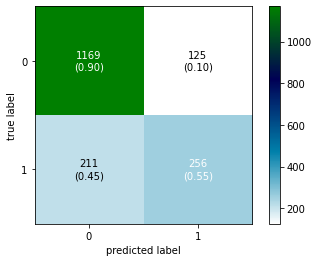

In [40]:
#confusion Matrix for Logistic Regression
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

model_LOG=LogisticRegression()
model_LOG.fit(X_FULL_train, y_FULL_train)
LOG_pred= model_LOG.predict(X_FULL_test)

labels=["No Churn", 'Churn']
mat =confusion_matrix(y_FULL_test, LOG_pred)
plot_confusion_matrix(conf_mat=mat, 
                      show_absolute=True, 
                      show_normed=True,
                      colorbar=True,
                      cmap = "ocean_r")
plt.show()